In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA


In [79]:
df = pd.read_csv('Datasets/sampled_dataset.csv')

In [80]:
df.head(12)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1167415,Source2,2,2021-02-04 12:48:21,2021-02-04 16:51:15,42.448910,-93.721138,NaN,NaN,7.770,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-4021880,Source1,2,2022-06-23 10:57:30,2022-06-23 15:43:00,38.858169,-77.219815,38.884636,-77.220805,1.829,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-1314019,Source2,3,2020-09-25 16:48:29,2020-09-25 17:38:44,32.434292,-82.500710,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-721069,Source2,2,2022-02-04 19:57:43,2022-02-04 20:42:10,39.106960,-76.939789,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
9,A-3677476,Source1,2,2023-03-26 14:38:00.000000000,2023-03-26 17:29:42.000000000,37.636405,-122.087711,37.644790,-122.093729,0.666,...,False,False,False,False,False,False,Day,Day,Day,Day


In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                56012 non-null   float64
 8   End_Lng                56012 non-null   float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            99999 non-null   object 
 11  Street                 99830 non-null   object 
 12  City                   99997 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [82]:
print(df.shape)

(100000, 46)


In [83]:
print(df.isnull().sum())

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  43988
End_Lng                  43988
Distance(mi)                 0
Description                  1
Street                     170
City                         3
County                       0
State                        0
Zipcode                     21
Country                      0
Timezone                   100
Airport_Code               302
Weather_Timestamp         1576
Temperature(F)            2120
Wind_Chill(F)            25933
Humidity(%)               2259
Pressure(in)              1817
Visibility(mi)            2262
Wind_Direction            2311
Wind_Speed(mph)           7443
Precipitation(in)        28622
Weather_Condition         2216
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [84]:
print("Totali i vlerave te zbrazta:", df.isnull().sum().sum())

Totali i vlerave te zbrazta: 166436


In [85]:
for val in ["?", "-", " ", "NA", ""]:
    print(val, (df == val).sum().sum())

? 0
- 0
  0
NA 0
 0


In [86]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


ID                        0.000
Source                    0.000
Severity                  0.000
Start_Time                0.000
End_Time                  0.000
Start_Lat                 0.000
Start_Lng                 0.000
End_Lat                  43.988
End_Lng                  43.988
Distance(mi)              0.000
Description               0.001
Street                    0.170
City                      0.003
County                    0.000
State                     0.000
Zipcode                   0.021
Country                   0.000
Timezone                  0.100
Airport_Code              0.302
Weather_Timestamp         1.576
Temperature(F)            2.120
Wind_Chill(F)            25.933
Humidity(%)               2.259
Pressure(in)              1.817
Visibility(mi)            2.262
Wind_Direction            2.311
Wind_Speed(mph)           7.443
Precipitation(in)        28.622
Weather_Condition         2.216
Amenity                   0.000
Bump                      0.000
Crossing

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("Datasets/sampled_dataset.csv")

In [89]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [90]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [91]:
df[['Start_Time', 'End_Time']].dtypes

Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [92]:
date_details = pd.DataFrame({
    'ID': df['ID'],
    'Start_Day': df['Start_Time'].dt.day_name(),
    'Start_Month': df['Start_Time'].dt.month_name(),
    'Start_Year': df['Start_Time'].dt.year.astype('Int64'),
    'Start_Hour': df['Start_Time'].dt.hour.astype('Int64'),
    'End_Day': df['End_Time'].dt.day_name(),
    'End_Month': df['End_Time'].dt.month_name(),
    'End_Year': df['End_Time'].dt.year.astype('Int64'),
    'End_Hour': df['End_Time'].dt.hour.astype('Int64'),
})

In [93]:
date_details.to_csv("Datasets/dates_exploded.csv", index=False)

In [94]:
df_merged = pd.merge(df, date_details, on='ID', how='inner')

In [95]:
start_idx = df.columns.get_loc("Start_Time") + 1
end_idx = df.columns.get_loc("End_Time") + 1

In [96]:
new_column_order = (
    list(df.columns[:start_idx]) +
    ['Start_Day', 'Start_Month', 'Start_Year', 'Start_Hour'] +
    list(df.columns[start_idx:end_idx]) +
    ['End_Day', 'End_Month', 'End_Year', 'End_Hour'] +
    list(df.columns[end_idx:])
)

In [97]:
df_merged = df_merged[new_column_order]

In [98]:
# Integrimi i dataseteve ne nje te vetem duke zberthyer daten ne dite, muaj, vit dhe ore
df_merged.to_csv("Datasets/Week2_Dataset.csv", index=False)

In [99]:
df_merged.dtypes

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
Start_Day                        object
Start_Month                      object
Start_Year                        Int64
Start_Hour                        Int64
End_Time                 datetime64[ns]
End_Day                          object
End_Month                        object
End_Year                          Int64
End_Hour                          Int64
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object


In [100]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [101]:
# Agregimi 1 - Numri i aksidenteve dhe vrazhdesia e tyre sipas ores (nga 0 deri 23)
df_merged_hourly = (
    df_merged.groupby('Start_Hour', as_index=False)
    .agg(
        Accident_Count=('ID', 'count'),
        Avg_Severity=('Severity', 'mean')
    )
    .sort_values(by='Start_Hour', ascending=True)
)

In [102]:
print(df_merged_hourly.to_string(index=False))

 Start_Hour  Accident_Count  Avg_Severity
          0            1293      2.249033
          1            1173      2.198636
          2            1087      2.241950
          3             962      2.269231
          4            1995      2.262155
          5            2725      2.238532
          6            4838      2.223646
          7            7115      2.203092
          8            6844      2.199006
          9            4197      2.243746
         10            4151      2.221152
         11            4127      2.226557
         12            4012      2.242522
         13            4582      2.229376
         14            5001      2.223755
         15            5994      2.229897
         16            6772      2.229622
         17            6833      2.227865
         18            5087      2.258895
         19            3421      2.243204
         20            2513      2.256665
         21            2205      2.258957
         22            1953      2

In [103]:
# Agregimi 2 - Vrazhdesia dhe numri i aksidenteve varesisht motit
df_merged_weather_severity = (
    df_merged.groupby('Weather_Condition', as_index=False)
    .agg(
        Avg_Severity=('Severity', 'mean'),
        Accident_Count=('ID', 'count')
    )
    .sort_values(by='Accident_Count', ascending=False)
)

In [104]:
print(df_merged_weather_severity.to_string(index=False))

           Weather_Condition  Avg_Severity  Accident_Count
                        Fair      2.128204           32971
               Mostly Cloudy      2.225856           13088
                       Clear      2.360554           10617
                      Cloudy      2.161588           10502
               Partly Cloudy      2.230300            9188
                    Overcast      2.393749            4927
                  Light Rain      2.240873            4492
            Scattered Clouds      2.372768            2688
                  Light Snow      2.261677            1670
                         Fog      2.156250            1312
                        Rain      2.241321            1181
                        Haze      2.201220             984
                Fair / Windy      2.155556             450
                  Heavy Rain      2.281690             426
               Light Drizzle      2.246057             317
              Cloudy / Windy      2.158120             2

In [105]:
df_merged.shape

(100000, 54)

In [106]:
df_merged.isnull().sum().sort_values(ascending=False)


End_Lat                  43988
End_Lng                  43988
Precipitation(in)        28622
Wind_Chill(F)            25933
Start_Month               9649
Start_Year                9649
End_Hour                  9649
End_Year                  9649
End_Time                  9649
Start_Hour                9649
End_Month                 9649
End_Day                   9649
Start_Day                 9649
Start_Time                9649
Wind_Speed(mph)           7443
Wind_Direction            2311
Visibility(mi)            2262
Humidity(%)               2259
Weather_Condition         2216
Temperature(F)            2120
Pressure(in)              1817
Weather_Timestamp         1576
Astronomical_Twilight      326
Nautical_Twilight          326
Civil_Twilight             326
Sunrise_Sunset             326
Airport_Code               302
Street                     170
Timezone                   100
Zipcode                     21
City                         3
Description                  1
Start_Ln

In [107]:
threshold = 0.5 * len(df_merged)
df_clean = df_merged.dropna(axis=1, thresh=threshold)
print("Kolonat pas heqjes se atyre qe iu mungojne me shume sesa 50% e vlerave")
print(df_clean.columns)

Kolonat pas heqjes se atyre qe iu mungojne me shume sesa 50% e vlerave
Index(['ID', 'Source', 'Severity', 'Start_Time', 'Start_Day', 'Start_Month',
       'Start_Year', 'Start_Hour', 'End_Time', 'End_Day', 'End_Month',
       'End_Year', 'End_Hour', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [108]:
df_merged.shape

(100000, 54)

In [109]:
duplicates = df_merged.duplicated().sum()
print("Numri i rreshtave te duplikuar:", duplicates)

df_merged = df_merged.drop_duplicates()


Numri i rreshtave te duplikuar: 0


In [110]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [111]:
# Hapesirat dhe uniformizimi i tekstit ne kolona te ndryshme
df_merged['Start_Day'] = df_merged['Start_Day'].str.strip().str.title()
df_merged['Start_Month'] = df_merged['Start_Month'].str.strip().str.title()

df_merged['End_Day'] = df_merged['End_Day'].str.strip().str.title()
df_merged['End_Month'] = df_merged['End_Month'].str.strip().str.title()

df_merged['Weather_Timestamp'] = pd.to_datetime(df_merged['Weather_Timestamp'], errors='coerce')
df_merged['Wind_Direction'] = df_merged['Wind_Direction'].str.strip().str.title()

df_merged['Weather_Condition'] = df_merged['Weather_Condition'].str.strip().str.title()
df_merged['Sunrise_Sunset'] = df_merged['Sunrise_Sunset'].str.strip().str.title()
df_merged['Civil_Twilight'] = df_merged['Civil_Twilight'].str.strip().str.title()
df_merged['Nautical_Twilight'] = df_merged['Nautical_Twilight'].str.strip().str.title()
df_merged['Astronomical_Twilight'] = df_merged['Astronomical_Twilight'].str.strip().str.title() 
df_merged['Street'] = df_merged['Street'].str.strip().str.title()

df_merged['City'] = df_merged['City'].str.strip().str.title()
df_merged['County'] = df_merged['County'].str.strip().str.title()   
df_merged['State'] = df_merged['State'].str.strip().str.upper()
df_merged['Zipcode'] = df_merged['Zipcode'].str.strip()
df_merged['Country'] = df_merged['Country'].str.strip().str.upper()
df_merged['Timezone'] = df_merged['Timezone'].str.strip().str.upper()
df_merged['Airport_Code'] = df_merged['Airport_Code'].str.strip().str.upper()



In [112]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [113]:
df_merged.replace(['Unknown', 'None', 'N/A', 'UNK'], np.nan, inplace=True)

In [114]:
df_merged.isna().sum().sort_values(ascending=False)


End_Lat                  43988
End_Lng                  43988
Precipitation(in)        28622
Wind_Chill(F)            25933
Start_Month               9649
Start_Year                9649
End_Hour                  9649
End_Year                  9649
End_Time                  9649
Start_Hour                9649
End_Month                 9649
End_Day                   9649
Start_Day                 9649
Start_Time                9649
Wind_Speed(mph)           7443
Wind_Direction            2311
Visibility(mi)            2262
Humidity(%)               2259
Weather_Condition         2216
Temperature(F)            2120
Pressure(in)              1817
Weather_Timestamp         1576
Astronomical_Twilight      326
Nautical_Twilight          326
Civil_Twilight             326
Sunrise_Sunset             326
Airport_Code               302
Street                     170
Timezone                   100
Zipcode                     21
City                         3
Description                  2
Start_Ln

In [115]:
df_merged.to_csv("Datasets/Week3_Dataset.csv", index=False)

In [116]:
missing = df_merged.isnull().sum().to_frame('MissingValues')
missing['MissingPercent'] = (missing['MissingValues'] / len(df)) * 100
missing = missing[missing['MissingValues'] > 0].sort_values('MissingPercent', ascending=False)
print("Kolonat me vlera mungese:")
print(missing.head(20))

Kolonat me vlera mungese:
                   MissingValues  MissingPercent
End_Lat                    43988          43.988
End_Lng                    43988          43.988
Precipitation(in)          28622          28.622
Wind_Chill(F)              25933          25.933
Start_Hour                  9649           9.649
End_Time                    9649           9.649
Start_Time                  9649           9.649
Start_Day                   9649           9.649
End_Month                   9649           9.649
End_Day                     9649           9.649
End_Hour                    9649           9.649
End_Year                    9649           9.649
Start_Month                 9649           9.649
Start_Year                  9649           9.649
Wind_Speed(mph)             7443           7.443
Wind_Direction              2311           2.311
Visibility(mi)              2262           2.262
Humidity(%)                 2259           2.259
Weather_Condition           2216           

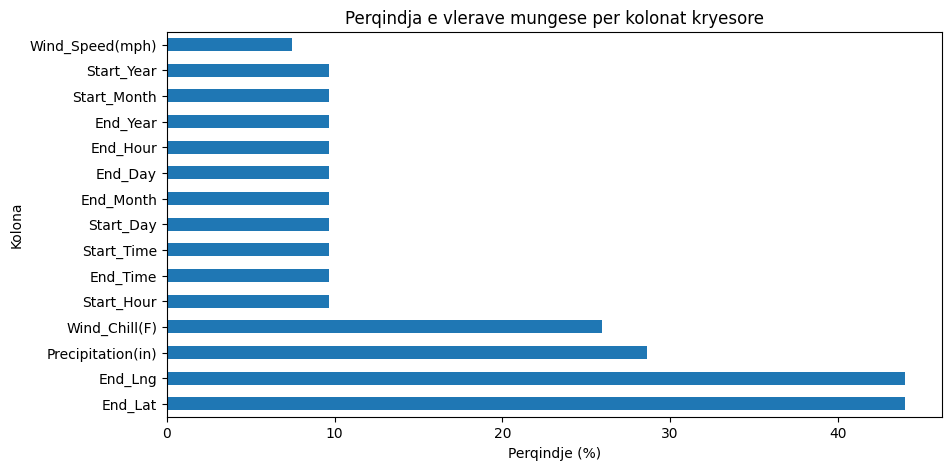

In [117]:
plt.figure(figsize=(10,5))
missing['MissingPercent'].head(15).plot(kind='barh')
plt.title("Perqindja e vlerave mungese per kolonat kryesore")
plt.xlabel("Perqindje (%)")
plt.ylabel("Kolona")
plt.show()

In [118]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Source                 100000 non-null  object        
 2   Severity               100000 non-null  int64         
 3   Start_Time             90351 non-null   datetime64[ns]
 4   Start_Day              90351 non-null   object        
 5   Start_Month            90351 non-null   object        
 6   Start_Year             90351 non-null   Int64         
 7   Start_Hour             90351 non-null   Int64         
 8   End_Time               90351 non-null   datetime64[ns]
 9   End_Day                90351 non-null   object        
 10  End_Month              90351 non-null   object        
 11  End_Year               90351 non-null   Int64         
 12  End_Hour               90351 non-null   Int64

In [119]:
num_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_merged[col].isnull().sum() > 0:
        median_value = df_merged[col].median()
        df_merged[col].fillna(median_value, inplace=True)
        print(f"Kolona '{col}' jane zvendesuar mungesat me medianen ({median_value})")

cat_cols = df_merged.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df_merged[col].isnull().sum() > 0:
        mode_value = df_merged[col].mode()[0] 
        df_merged[col].fillna(mode_value, inplace=True)
        print(f"Kolona '{col}' jane zvendesuar mungesat me moden ('{mode_value}')")


remaining_missing = df_merged.isnull().sum().sum()
print(f"Vlerat qe mungojne pas trajtimit: {remaining_missing} (nga {len(df_merged)} rreshta total)")



Kolona 'Start_Year' jane zvendesuar mungesat me medianen (2020.0)
Kolona 'Start_Hour' jane zvendesuar mungesat me medianen (13.0)
Kolona 'End_Year' jane zvendesuar mungesat me medianen (2020.0)
Kolona 'End_Hour' jane zvendesuar mungesat me medianen (13.0)
Kolona 'End_Lat' jane zvendesuar mungesat me medianen (36.38432100916771)
Kolona 'End_Lng' jane zvendesuar mungesat me medianen (-87.96513000000002)
Kolona 'Temperature(F)' jane zvendesuar mungesat me medianen (64.0)
Kolona 'Wind_Chill(F)' jane zvendesuar mungesat me medianen (62.0)
Kolona 'Humidity(%)' jane zvendesuar mungesat me medianen (67.0)
Kolona 'Pressure(in)' jane zvendesuar mungesat me medianen (29.85)
Kolona 'Visibility(mi)' jane zvendesuar mungesat me medianen (10.0)
Kolona 'Wind_Speed(mph)' jane zvendesuar mungesat me medianen (7.0)
Kolona 'Precipitation(in)' jane zvendesuar mungesat me medianen (0.0)
Kolona 'Start_Day' jane zvendesuar mungesat me moden ('Friday')
Kolona 'Start_Month' jane zvendesuar mungesat me moden ('D

C:\Users\Fjolla\AppData\Local\Temp\ipykernel_11036\1838853196.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(median_value, inplace=True)
C:\Users\Fjolla\AppData\Local\Temp\ipykernel_11036\1838853196.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Kolona 'Description' jane zvendesuar mungesat me moden ('A crash has occurred causing no to minimum delays. Use caution.')
Kolona 'Street' jane zvendesuar mungesat me moden ('I-95 N')
Kolona 'City' jane zvendesuar mungesat me moden ('Miami')
Kolona 'Zipcode' jane zvendesuar mungesat me moden ('91761')
Kolona 'Timezone' jane zvendesuar mungesat me moden ('US/EASTERN')
Kolona 'Airport_Code' jane zvendesuar mungesat me moden ('KCQT')
Kolona 'Wind_Direction' jane zvendesuar mungesat me moden ('Calm')
Kolona 'Weather_Condition' jane zvendesuar mungesat me moden ('Fair')
Kolona 'Sunrise_Sunset' jane zvendesuar mungesat me moden ('Day')
Kolona 'Civil_Twilight' jane zvendesuar mungesat me moden ('Day')
Kolona 'Nautical_Twilight' jane zvendesuar mungesat me moden ('Day')
Kolona 'Astronomical_Twilight' jane zvendesuar mungesat me moden ('Day')
Vlerat qe mungojne pas trajtimit: 20874 (nga 100000 rreshta total)


In [120]:
from datetime import timedelta

datetime_cols = ['Start_Time', 'End_Time', 'Weather_Timestamp']
for col in datetime_cols:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')

valid_duration = df_merged.dropna(subset=['Start_Time', 'End_Time'])
average_duration = (valid_duration['End_Time'] - valid_duration['Start_Time']).median()

print(f" Kohezgjatja mesatare e ngjarjeve: {average_duration}")

for i, row in df_merged.iterrows():
    if pd.isna(row['End_Time']) and pd.notna(row['Start_Time']):
        df_merged.at[i, 'End_Time'] = row['Start_Time'] + average_duration
    elif pd.isna(row['Start_Time']) and pd.notna(row['End_Time']):
        df_merged.at[i, 'Start_Time'] = row['End_Time'] - average_duration

df_merged['Weather_Timestamp'].fillna(df_merged['Start_Time'], inplace=True)

for col in datetime_cols:
    if df_merged[col].isnull().sum() > 0:
        median_date = df_merged[col].dropna().median()
        df_merged[col].fillna(median_date, inplace=True)
        print(f"Kolona '{col}' mungesat u plotesuan me medianen ({median_date.date()})")

remaining_missing = df_merged.isnull().sum().sum()
print(f" Vlerat qe mungojne pas trajtimit te personalizuar: {remaining_missing}")

 Kohezgjatja mesatare e ngjarjeve: 0 days 01:02:39
Kolona 'Start_Time' mungesat u plotesuan me medianen (2020-06-23)
Kolona 'End_Time' mungesat u plotesuan me medianen (2020-06-24)
Kolona 'Weather_Timestamp' mungesat u plotesuan me medianen (2020-11-10)
 Vlerat qe mungojne pas trajtimit te personalizuar: 0


C:\Users\Fjolla\AppData\Local\Temp\ipykernel_11036\2440771264.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Weather_Timestamp'].fillna(df_merged['Start_Time'], inplace=True)
C:\Users\Fjolla\AppData\Local\Temp\ipykernel_11036\2440771264.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [121]:
# Feature selection
orig_cols = list(df_merged.columns)

col_map_lower = {c.lower().strip(): c for c in df_merged.columns}

def find_column(possible_names):
    for name in possible_names:
        key = name.lower()
        if key in col_map_lower:
            return col_map_lower[key]
    return None

# Mapp-im i mundshem per kolonat qe na duhen
start_time_col = find_column(['start_time','occurred_on_date','date','starttime','time'])
city_col       = find_column(['city','location_city','town','municipality'])
lat_col        = find_column(['start_lat','latitude','lat','start_latitude'])
lng_col        = find_column(['start_lng','longitude','lng','start_longitude'])
temp_col       = find_column(['temperature(f)','temperature','temp'])
prec_col       = find_column(['precipitation(in)','precipitation','rain'])
vis_col        = find_column(['visibility(mi)','visibility','vis'])
severity_col   = find_column(['severity','offense_severity','severity_level'])

print("Detected columns mapping:")
print(f" start_time_col: {start_time_col}")
print(f" city_col      : {city_col}")
print(f" lat_col       : {lat_col}")
print(f" lng_col       : {lng_col}")
print(f" temp_col      : {temp_col}")
print(f" prec_col      : {prec_col}")
print(f" vis_col       : {vis_col}")
print(f" severity_col  : {severity_col}")

# Temperature
if temp_col is not None and 'Temperature' not in df_merged.columns:
    df_merged['Temperature'] = pd.to_numeric(df_merged[temp_col], errors='coerce')

# Precipitation - Rain flag
if prec_col is not None and 'Rain' not in df_merged.columns:
    df_merged['Precipitation_raw'] = pd.to_numeric(df_merged[prec_col], errors='coerce')
    df_merged['Rain'] = (df_merged['Precipitation_raw'] > 0).astype(int)
elif 'Precipitation(in)' in df_merged.columns and 'Rain' not in df_merged.columns:
    df_merged['Precipitation_raw'] = pd.to_numeric(df_merged['Precipitation(in)'], errors='coerce')
    df_merged['Rain'] = (df_merged['Precipitation_raw'] > 0).astype(int)

# Visibility
if vis_col is not None and 'Visibility' not in df_merged.columns:
    df_merged['Visibility'] = pd.to_numeric(df_merged[vis_col], errors='coerce')

# Start Time
if start_time_col is None:
    print(" Nuk u gjet kolona e kohes me emra te pritshem ")
else:
    df_merged[start_time_col] = pd.to_datetime(df_merged[start_time_col], errors='coerce')
    if 'Start_Time' not in df_merged.columns:
        df_merged['Start_Time'] = df_merged[start_time_col]

    df_merged['Hour']    = df_merged['Start_Time'].dt.hour
    df_merged['Day']     = df_merged['Start_Time'].dt.day
    df_merged['Month']   = df_merged['Start_Time'].dt.month
    df_merged['Weekday'] = df_merged['Start_Time'].dt.day_name()
    df_merged['Is_Weekend'] = df_merged['Weekday'].isin(['Saturday','Sunday']).astype(int)
    df_merged['Season'] = df_merged['Month'].map({
        12:'Winter',1:'Winter',2:'Winter',
        3:'Spring',4:'Spring',5:'Spring',
        6:'Summer',7:'Summer',8:'Summer',
        9:'Fall',10:'Fall',11:'Fall'
    })
    print("Vetite(feature) kohore u krijuan: Hour, Day, Month, Weekday, Is_Weekend, " \
    "on")


if city_col is not None:
    location_key = city_col
    print(f" Do te perdoret kolona '{location_key}' si location key.")
else:
    alt = find_column(['state','zip','zipcode','county','street'])
    if alt is not None:
        location_key = alt
        print(f"City mungon, do te perdoret '{location_key}' si location key.")
    else:
        location_key = None
        print(" Nuk u gjet City/State/Zip/Street per grupim, agregimet do te jene globale.")

# Krijimi i vetive (feature creation)
# 'Accident_Count_Last_Week' dhe 'Accidents_Per_Day_Avg'
if 'Start_Time' in df_merged.columns:
    df_time = df_merged[['Start_Time'] + ([location_key] if location_key is not None else [])].copy() if location_key else df_merged[['Start_Time']].copy()
    df_time['date'] = df_time['Start_Time'].dt.date

    if location_key is not None:
        daily = df_time.groupby([location_key, 'date']).size().reset_index(name='daily_count')
        daily['date'] = pd.to_datetime(daily['date'])
        daily = daily.sort_values([location_key, 'date'])

        def rolling_7d_sum(g):
            g = g.set_index('date').asfreq('D', fill_value=0)  
            g['rolling_7d'] = g['daily_count'].rolling(window=7, min_periods=1).sum()
            return g.reset_index()

        rolled = daily.groupby(location_key).apply(rolling_7d_sum).reset_index(level=0, drop=True).reset_index()
        rolled.rename(columns={'date':'date_dt', 'rolling_7d':'Accident_Count_Last_Week', 'daily_count':'Daily_Count'}, inplace=True)

        avg_daily = daily.groupby(location_key)['daily_count'].mean().rename('Accidents_Per_Day_Avg').reset_index()

        df_merged['date'] = df_merged['Start_Time'].dt.date

        merged_roll = rolled.merge(avg_daily, on=location_key, how='left')

        merged_roll.rename(columns={'date_dt':'date'}, inplace=True)

        df_merged['date'] = pd.to_datetime(df_merged['date']).dt.date
        merged_roll['date'] = pd.to_datetime(merged_roll['date']).dt.date

        df_merged = df_merged.merge(merged_roll[[location_key, 'date', 'Accident_Count_Last_Week', 'Accidents_Per_Day_Avg']],on=[location_key, 'date'],how='left')
        df_merged['Accident_Count_Last_Week'] = pd.to_numeric(df_merged['Accident_Count_Last_Week'], errors='coerce').fillna(0).astype(int)
        df_merged['Accidents_Per_Day_Avg'] = pd.to_numeric(df_merged['Accidents_Per_Day_Avg'], errors='coerce').fillna(0)

        df_merged.drop(columns=['date'], inplace=True)

        print(" U krijuan Accidents_Per_Day_Avg dhe Accident_Count_Last_Week (nga location).")

    else:
        daily_global = df_time.groupby('date').size().reset_index(name='daily_count')
        daily_global['date'] = pd.to_datetime(daily_global['date'])
        daily_global = daily_global.set_index('date').asfreq('D', fill_value=0).sort_index()
        daily_global['Accident_Count_Last_Week'] = daily_global['daily_count'].rolling(window=7, min_periods=1).sum()
        avg_global = daily_global['daily_count'].mean()

        df_merged['date'] = df_merged['Start_Time'].dt.date
        daily_global = daily_global.reset_index().rename(columns={'index':'date'})
        df_merged = df_merged.merge(daily_global[['date','Accident_Count_Last_Week']], left_on='date', right_on='date', how='left')
        df_merged['Accidents_Per_Day_Avg'] = avg_global
        df_merged['Accident_Count_Last_Week'] = pd.to_numeric(df_merged['Accident_Count_Last_Week'], errors='coerce').fillna(0).astype(int)
        df_merged.drop(columns=['date'], inplace=True)
        print(" U krijuan Accidents_Per_Day_Avg dhe Accident_Count_Last_Week.")
else:
    print("Nuk mund te krijohen feature kohore sepse Start_Time mungon ose eshte i pavlefshem.")


candidate_features = ['Hour','Day','Month','Season','Is_Weekend',
                      city_col if city_col is not None else None,
                      lat_col if lat_col is not None else None,
                      lng_col if lng_col is not None else None,
                      'Temperature','Rain','Visibility',
                      'Accident_Count_Last_Week','Accidents_Per_Day_Avg']


selected_features = [f for f in candidate_features if f and f in df_merged.columns]
print(f"\n Feature te perzgjedhura per analize/modelim ({len(selected_features)}):\n{selected_features}")

for col in ['Hour','Is_Weekend','Season','Temperature','Rain','Visibility','Accident_Count_Last_Week','Accidents_Per_Day_Avg']:
    print(f" - {col}: {'OK' if col in df_merged.columns else 'Mungon'}")


print(f" {df_merged.shape}")


Detected columns mapping:
 start_time_col: Start_Time
 city_col      : City
 lat_col       : Start_Lat
 lng_col       : Start_Lng
 temp_col      : Temperature(F)
 prec_col      : Precipitation(in)
 vis_col       : Visibility(mi)
 severity_col  : Severity
Vetite(feature) kohore u krijuan: Hour, Day, Month, Weekday, Is_Weekend, on
 Do te perdoret kolona 'City' si location key.


C:\Users\Fjolla\AppData\Local\Temp\ipykernel_11036\3646243930.py:100: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolled = daily.groupby(location_key).apply(rolling_7d_sum).reset_index(level=0, drop=True).reset_index()


 U krijuan Accidents_Per_Day_Avg dhe Accident_Count_Last_Week (nga location).

 Feature te perzgjedhura per analize/modelim (13):
['Hour', 'Day', 'Month', 'Season', 'Is_Weekend', 'City', 'Start_Lat', 'Start_Lng', 'Temperature', 'Rain', 'Visibility', 'Accident_Count_Last_Week', 'Accidents_Per_Day_Avg']
 - Hour: OK
 - Is_Weekend: OK
 - Season: OK
 - Temperature: OK
 - Rain: OK
 - Visibility: OK
 - Accident_Count_Last_Week: OK
 - Accidents_Per_Day_Avg: OK
 (100000, 66)


In [122]:
print(df_merged[['Accident_Count_Last_Week','Accidents_Per_Day_Avg']].head())

   Accident_Count_Last_Week  Accidents_Per_Day_Avg
0                         1               1.135714
1                         9               1.132353
2                         1               1.052632
3                         1               1.057851
4                         2               1.090909


In [123]:
df_disc = df_merged.copy()

numeric_cols = df_disc.select_dtypes(include=['float64', 'int64', 'Int64']).columns

exclude_cols = ['ID', 'Severity']  
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]


discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

for col in numeric_cols:
    if df_disc[col].nunique() > 4:
        try:
            df_disc[col + '_Binned'] = discretizer.fit_transform(df_disc[[col]])
            print(f" Kolona '{col}' u diskretizua me sukses ne 4 intervale.")
        except Exception as e:
            print(f"Kolona '{col}' nuk u diskretizua ({e}).")

binned_cols = [col for col in df_disc.columns if col.endswith('_Binned')]
print(f"\nTotali i kolonave te reja te krijuara: {len(binned_cols)}")
print("Shembuj te kolonave te diskretizuara:", binned_cols[:10])

df_disc.head(5)


 Kolona 'Start_Year' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Hour' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Year' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Hour' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Lat' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Lng' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Lat' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Lng' u diskretizua me sukses ne 4 intervale.
 Kolona 'Distance(mi)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Temperature(F)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Wind_Chill(F)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Humidity(%)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Pressure(in)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Visibility(mi)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Wind_Speed(mph)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Precipitation(in)' u diskretizua me sukses ne 4 intervale.
 Kolona 

C:\Users\Fjolla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\Fjolla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this wa

,ID,Source,Severity,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,...,Humidity(%)_Binned,Pressure(in)_Binned,Visibility(mi)_Binned,Wind_Speed(mph)_Binned,Precipitation(in)_Binned,Temperature_Binned,Precipitation_raw_Binned,Visibility_Binned,Accident_Count_Last_Week_Binned,Accidents_Per_Day_Avg_Binned
0,A-7182628,Source1,1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,...,2.0,3.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0
1,A-5404588,Source1,2,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,...,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0
2,A-156000,Source3,3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,...,0.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0
3,A-1871277,Source2,3,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,...,3.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
4,A-2031222,Source2,2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,...,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0


In [124]:
df_disc.head(3).filter(like='_Binned')

,Start_Year_Binned,Start_Hour_Binned,End_Year_Binned,End_Hour_Binned,Start_Lat_Binned,Start_Lng_Binned,End_Lat_Binned,End_Lng_Binned,Distance(mi)_Binned,Temperature(F)_Binned,...,Humidity(%)_Binned,Pressure(in)_Binned,Visibility(mi)_Binned,Wind_Speed(mph)_Binned,Precipitation(in)_Binned,Temperature_Binned,Precipitation_raw_Binned,Visibility_Binned,Accident_Count_Last_Week_Binned,Accidents_Per_Day_Avg_Binned
0,2.0,1.0,2.0,1.0,0.0,3.0,0.0,3.0,0.0,3.0,...,2.0,3.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0
1,2.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,1.0,...,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.0,3.0,0.0,3.0,1.0,2.0,2.0,2.0,0.0,3.0,...,0.0,2.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0


In [125]:
df_merged.to_csv("Datasets/Week4_Dataset.csv", index=False)

In [126]:
df_merged.head()

,ID,Source,Severity,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,...,Rain,Visibility,Hour,Day,Month,Weekday,Is_Weekend,Season,Accident_Count_Last_Week,Accidents_Per_Day_Avg
0,A-7182628,Source1,1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,...,1,10.0,9,17,4,Friday,0,Spring,1,1.135714
1,A-5404588,Source1,2,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,...,0,10.0,21,23,6,Tuesday,0,Summer,9,1.132353
2,A-156000,Source3,3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,...,0,10.0,16,12,8,Friday,0,Summer,1,1.052632
3,A-1871277,Source2,3,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,...,0,10.0,15,20,9,Friday,0,Fall,1,1.057851
4,A-2031222,Source2,2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,...,0,10.0,16,3,6,Monday,0,Summer,2,1.090909


In [127]:
kolonat = df_merged.columns
for col in kolonat:
    print(col)


ID
Source
Severity
Start_Time
Start_Day
Start_Month
Start_Year
Start_Hour
End_Time
End_Day
End_Month
End_Year
End_Hour
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Street
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Temperature
Precipitation_raw
Rain
Visibility
Hour
Day
Month
Weekday
Is_Weekend
Season
Accident_Count_Last_Week
Accidents_Per_Day_Avg


In [128]:
df_merged["Severity_binary"] = (df_merged["Severity"] >= 3).astype(int) 

df_merged["Severity_binary"].value_counts()


Severity_binary
0    80434
1    19566
Name: count, dtype: int64

In [129]:
cols_to_drop = [
    "Street",
    "City",
    "Zipcode",
    "Airport_Code",
    "Description"
]

df_merged = df_merged.drop(columns=cols_to_drop, errors="ignore")
df_merged.head()   

,ID,Source,Severity,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,...,Visibility,Hour,Day,Month,Weekday,Is_Weekend,Season,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary
0,A-7182628,Source1,1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,...,10.0,9,17,4,Friday,0,Spring,1,1.135714,0
1,A-5404588,Source1,2,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,...,10.0,21,23,6,Tuesday,0,Summer,9,1.132353,0
2,A-156000,Source3,3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,...,10.0,16,12,8,Friday,0,Summer,1,1.052632,1
3,A-1871277,Source2,3,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,...,10.0,15,20,9,Friday,0,Fall,1,1.057851,1
4,A-2031222,Source2,2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,...,10.0,16,3,6,Monday,0,Summer,2,1.090909,0


In [130]:
cat_cols = [
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
    "Season"
]


df_merged[cat_cols].head()


,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Season
0,Day,Day,Day,Day,Spring
1,Day,Day,Day,Day,Summer
2,Day,Day,Day,Day,Summer
3,Day,Day,Day,Day,Fall
4,Day,Day,Day,Day,Summer


In [131]:
available_cat_cols = [c for c in cat_cols if c in df_merged.columns]
missing_cat_cols = [c for c in cat_cols if c not in df_merged.columns]

if missing_cat_cols:
    print("Anashkaloj kolonat kategorike qe mungojne:", missing_cat_cols)

if available_cat_cols:
    df_merged = pd.get_dummies(df_merged, columns=available_cat_cols, drop_first=True)
    print("Krijimi i vlerave dummy per:", available_cat_cols)
else:
    print("Nuk ka kolona kategorike per get_dummies; asgje nuk u ndryshua.")

Krijimi i vlerave dummy per: ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Season']


In [132]:
df_merged = df_merged.drop(columns=["Severity"], errors="ignore") 
df_merged.head()

,ID,Source,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,End_Month,...,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter
0,A-7182628,Source1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,April,...,1,1.135714,0,False,False,False,False,True,False,False
1,A-5404588,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,9,1.132353,0,False,False,False,False,False,True,False
2,A-156000,Source3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,August,...,1,1.052632,1,False,False,False,False,False,True,False
3,A-1871277,Source2,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,September,...,1,1.057851,1,False,False,False,False,False,False,False
4,A-2031222,Source2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,June,...,2,1.090909,0,False,False,False,False,False,True,False


In [133]:
df_merged.to_csv("Datasets/df_binarized.csv", index=False)

print("Binarizimi:") 
print("Forma finale:", df_merged.shape)
df_merged.head()

Binarizimi:
Forma finale: (100000, 63)


,ID,Source,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,End_Month,...,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter
0,A-7182628,Source1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,April,...,1,1.135714,0,False,False,False,False,True,False,False
1,A-5404588,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,9,1.132353,0,False,False,False,False,False,True,False
2,A-156000,Source3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,August,...,1,1.052632,1,False,False,False,False,False,True,False
3,A-1871277,Source2,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,September,...,1,1.057851,1,False,False,False,False,False,False,False
4,A-2031222,Source2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,June,...,2,1.090909,0,False,False,False,False,False,True,False


In [134]:
df_binarized = pd.read_csv("Datasets/df_binarized.csv")

df_binarized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Source                       100000 non-null  object 
 2   Start_Time                   100000 non-null  object 
 3   Start_Day                    100000 non-null  object 
 4   Start_Month                  100000 non-null  object 
 5   Start_Year                   100000 non-null  int64  
 6   Start_Hour                   100000 non-null  int64  
 7   End_Time                     100000 non-null  object 
 8   End_Day                      100000 non-null  object 
 9   End_Month                    100000 non-null  object 
 10  End_Year                     100000 non-null  int64  
 11  End_Hour                     100000 non-null  int64  
 12  Start_Lat                    100000 non-null  float64
 13  

In [135]:
print(df_binarized.columns.tolist())

['ID', 'Source', 'Start_Time', 'Start_Day', 'Start_Month', 'Start_Year', 'Start_Hour', 'End_Time', 'End_Day', 'End_Month', 'End_Year', 'End_Hour', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'County', 'State', 'Country', 'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Temperature', 'Precipitation_raw', 'Rain', 'Visibility', 'Hour', 'Day', 'Month', 'Weekday', 'Is_Weekend', 'Accident_Count_Last_Week', 'Accidents_Per_Day_Avg', 'Severity_binary', 'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night', 'Astronomical_Twilight_Night', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [136]:
# Transformimi i te dhenave

missing_values = df_binarized.isna().sum().sort_values(ascending=False)
print("Atributet me vlera qe mungojne (20):\n")
print(missing_values[missing_values > 0].head(20))

print("\nTotalii i vlerave qe mungojne:", df_binarized.isna().sum().sum())


Atributet me vlera qe mungojne (20):

Series([], dtype: int64)

Totalii i vlerave qe mungojne: 0


In [137]:
print("Forma:", df_binarized.shape)
print(df_binarized.isna().sum().sum())

print("\nTipi i te dhenave:")
print(df_binarized.dtypes.value_counts())


Forma: (100000, 63)
0

Tipi i te dhenave:
bool       20
object     16
float64    16
int64      11
Name: count, dtype: int64


In [138]:
print("\nStatistika permbledhese per atributet me vlera numerike:")
print(df_binarized.describe().T.head(10)) 

print("\nParaqitja e te dhenave:")
display(df_binarized.head(10))


Statistika permbledhese per atributet me vlera numerike:
                   count         mean        std          min          25%  \
Start_Year      100000.0  2019.727230   1.795795  2016.000000  2018.000000   
Start_Hour      100000.0    12.336160   5.211120     0.000000     8.000000   
End_Year        100000.0  2019.728070   1.796457  2016.000000  2018.000000   
End_Hour        100000.0    12.934630   5.548570     0.000000     9.000000   
Start_Lat       100000.0    36.242398   5.060907    24.602680    33.433554   
Start_Lng       100000.0   -94.668242  17.380644  -124.535726  -117.206720   
End_Lat         100000.0    36.350322   3.940008    24.681584    35.247418   
End_Lng         100000.0   -92.240946  14.053682  -124.544508   -93.288053   
Distance(mi)    100000.0     0.558467   1.723387     0.000000     0.000000   
Temperature(F)  100000.0    61.558778  18.899147   -89.000000    49.000000   

                        50%          75%          max  
Start_Year      2020.000000

,ID,Source,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,End_Month,...,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter
0,A-7182628,Source1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,April,...,1,1.135714,0,False,False,False,False,True,False,False
1,A-5404588,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,9,1.132353,0,False,False,False,False,False,True,False
2,A-156000,Source3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,August,...,1,1.052632,1,False,False,False,False,False,True,False
3,A-1871277,Source2,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,September,...,1,1.057851,1,False,False,False,False,False,False,False
4,A-2031222,Source2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,June,...,2,1.090909,0,False,False,False,False,False,True,False
5,A-1167415,Source2,2021-02-04 12:48:21,Thursday,February,2021,12,2021-02-04 16:51:15,Thursday,February,...,1,1.000000,0,False,False,False,False,False,False,True
6,A-4021880,Source1,2022-06-23 10:57:30,Thursday,June,2022,10,2022-06-23 15:43:00,Thursday,June,...,1,1.023256,0,False,False,False,False,False,True,False
7,A-1314019,Source2,2020-09-25 16:48:29,Friday,September,2020,16,2020-09-25 17:38:44,Friday,September,...,1,1.200000,1,False,False,False,False,False,False,False
8,A-721069,Source2,2022-02-04 19:57:43,Friday,February,2022,19,2022-02-04 20:42:10,Friday,February,...,1,1.000000,0,True,True,True,True,False,False,True
9,A-3677476,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,5,1.061224,0,False,False,False,False,False,True,False


In [139]:
df_binarized.to_csv("Datasets/df_transformed.csv", index=False)

In [140]:
df_binarized.head(15)

,ID,Source,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,End_Month,...,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter
0,A-7182628,Source1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,April,...,1,1.135714,0,False,False,False,False,True,False,False
1,A-5404588,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,9,1.132353,0,False,False,False,False,False,True,False
2,A-156000,Source3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,August,...,1,1.052632,1,False,False,False,False,False,True,False
3,A-1871277,Source2,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,September,...,1,1.057851,1,False,False,False,False,False,False,False
4,A-2031222,Source2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,June,...,2,1.090909,0,False,False,False,False,False,True,False
5,A-1167415,Source2,2021-02-04 12:48:21,Thursday,February,2021,12,2021-02-04 16:51:15,Thursday,February,...,1,1.000000,0,False,False,False,False,False,False,True
6,A-4021880,Source1,2022-06-23 10:57:30,Thursday,June,2022,10,2022-06-23 15:43:00,Thursday,June,...,1,1.023256,0,False,False,False,False,False,True,False
7,A-1314019,Source2,2020-09-25 16:48:29,Friday,September,2020,16,2020-09-25 17:38:44,Friday,September,...,1,1.200000,1,False,False,False,False,False,False,False
8,A-721069,Source2,2022-02-04 19:57:43,Friday,February,2022,19,2022-02-04 20:42:10,Friday,February,...,1,1.000000,0,True,True,True,True,False,False,True
9,A-3677476,Source1,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,December,...,5,1.061224,0,False,False,False,False,False,True,False


In [141]:
df_new = pd.read_csv("Datasets/df_transformed.csv")
print("Forma fillestare:", df_new.shape)

Forma fillestare: (100000, 63)


In [142]:

df_new = df_new.drop(['Start_Time', 'End_Time', 'Weather_Timestamp','Wind_Direction'], axis=1)

In [143]:
numeric_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numeric_cols = df_new.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"Kolona numerike: {len(numeric_cols)}")
print(f"Kolona jo-numerike: {len(non_numeric_cols)}")

Kolona numerike: 27
Kolona jo-numerike: 32


In [144]:

scaling_cols = []
for c in numeric_cols:
    ser = df_new[c].dropna()
    if ser.isin([0, 1]).all():
        continue
    if pd.api.types.is_float_dtype(df_new[c]):
        scaling_cols.append(c)
    else:
        if ser.nunique() > 10:
            scaling_cols.append(c)

for forbid in ['ID', 'Severity']:
    if forbid in scaling_cols:
        scaling_cols.remove(forbid)

binary_cols = [c for c in df_new.columns if df_new[c].dropna().isin([True, False]).all()]
for col in binary_cols:
    df_new[col] = df_new[col].astype(int)

normalize_cols = [c for c in numeric_cols if c not in scaling_cols and c not in binary_cols]

print("\nPermbledhje e ndarjes se kolonave:")
print("Scaling:", scaling_cols)
print("Binarizim :", binary_cols)
print("Normalizim:", normalize_cols)



Permbledhje e ndarjes se kolonave:
Scaling: ['Start_Hour', 'End_Hour', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Temperature', 'Precipitation_raw', 'Visibility', 'Hour', 'Day', 'Month', 'Accident_Count_Last_Week', 'Accidents_Per_Day_Avg']
Binarizim : ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Rain', 'Is_Weekend', 'Severity_binary', 'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night', 'Astronomical_Twilight_Night', 'Season_Spring', 'Season_Summer', 'Season_Winter']
Normalizim: ['Start_Year', 'End_Year']


In [145]:
df_new = df_new.copy()

In [146]:
scaler = StandardScaler()
if scaling_cols:
    df_new[scaling_cols] = scaler.fit_transform(df_new[scaling_cols])
    print(f"Scaling u aplikua per {len(scaling_cols)} kolona.")


Scaling u aplikua per 22 kolona.


In [147]:
normalizer = Normalizer(norm='l2')
if normalize_cols:
    df_new[normalize_cols] = normalizer.fit_transform(df_new[normalize_cols])
    print(f"Normalizimi u aplikua per {len(normalize_cols)} kolona.")

Normalizimi u aplikua per 2 kolona.


In [148]:
df_new.to_csv("Datasets/Week4_transformed_final.csv", index=False)

print("Forma finale:", df_new.shape)

Forma finale: (100000, 59)


In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df_new.head())

          ID   Source Start_Day Start_Month  Start_Year  Start_Hour End_Day  \
0  A-7182628  Source1    Friday       April    0.707107   -0.640203  Friday   
1  A-5404588  Source1    Friday    December    0.707107    0.127390  Friday   
2   A-156000  Source3    Friday      August    0.707107    0.703085  Friday   
3  A-1871277  Source2    Friday   September    0.707107    0.511186  Friday   
4  A-2031222  Source2    Monday        June    0.707107    0.703085  Monday   

   End_Month  End_Year  End_Hour  Start_Lat  Start_Lng   End_Lat   End_Lng  \
0      April  0.707107 -0.528901  -1.884157   0.837078 -2.447576  0.862525   
1   December  0.707107  0.011781   0.501617  -1.530306  0.616767 -2.065296   
2     August  0.707107  0.732692  -0.445999   0.598306  0.008629  0.304250   
3  September  0.707107  0.372237   2.149093  -1.604590  0.008629  0.304250   
4       June  0.707107  0.912919  -0.551493  -0.990883  0.008629  0.304250   

   Distance(mi)      County State Country     Timezone  

In [150]:
print(df_new['Source'].unique())

['Source1' 'Source3' 'Source2']


In [151]:
from sklearn.preprocessing import LabelEncoder

drop_cols = ['ID'] 
df_new = df_new.drop(columns=drop_cols, errors='ignore')

one_hot_cols = ['Source', 'Start_Day', 'End_Day', 'Weekday',
                'Timezone', 'Weather_Condition']
available_one_hot_cols = [col for col in one_hot_cols if col in df_new.columns]
if available_one_hot_cols:
    df_new = pd.get_dummies(df_new, columns=available_one_hot_cols, drop_first=True)
else:
    print("Nuk ka kolona te gatshme per one-hot encoding.")

label_cols = ['County', 'State', 'Country']
le = LabelEncoder()
for col in label_cols:
    if col in df_new.columns:
        df_new[col] = le.fit_transform(df_new[col].astype(str))

month_order = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
               'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
for col in ['Start_Month', 'End_Month']:
    if col in df_new.columns:
        df_new[col] = df_new[col].map(month_order)

print("Te gjitha kolonat me vlera tesktuale jane shnderruar ne numerike.")
print("Forma pas encoding:", df_new.shape)
df_new.head()


Te gjitha kolonat me vlera tesktuale jane shnderruar ne numerike.
Forma pas encoding: (100000, 150)


,Start_Month,Start_Year,Start_Hour,End_Month,End_Year,End_Hour,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),County,State,Country,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Temperature,Precipitation_raw,Rain,Visibility,Hour,Day,Month,Is_Weekend,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter,Source_Source2,Source_Source3,Start_Day_Monday,Start_Day_Saturday,Start_Day_Sunday,Start_Day_Thursday,Start_Day_Tuesday,Start_Day_Wednesday,End_Day_Monday,End_Day_Saturday,End_Day_Sunday,End_Day_Thursday,End_Day_Tuesday,End_Day_Wednesday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Timezone_US/EASTERN,Timezone_US/MOUNTAIN,Timezone_US/PACIFIC,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Blowing Snow,Weather_Condition_Blowing Snow / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle / Windy,Weather_Condition_Drizzle And Fog,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Freezing Rain,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Snow / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms And Rain,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Freezing Rain / Windy,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain With Thunder,Weather_Condition_Light Sleet,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow And Sleet,Weather_Condition_Light Thunderstorms And Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches Of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Shallow Fog / Windy,Weather_Condition_Showers In The Vicinity,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Smoke / Windy,Weather_Condition_Snow,Weather_Condition_Snow / Windy,Weather_Condition_Snow And Sleet,Weather_Condition_Snow And Sleet / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder In The Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms And Rain,Weather_Condition_Tornado,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy
0,4,0.707107,-0.640203,4,0.707107,-0.528901,-1.884157,0.837078,-2.447576,0.862525,-0.324054,846,8,0,0.869950,0.974169,0.712751,0.587617,0.334426,0.931834,0.043457,0,0,0,0,0,0,0,0,0,0,0,1,0,0.869950,0.043457,1,0.334426,-0.707031,0.069036,-0.775647,0,-0.186705,-0.338304,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [152]:
bool_cols = df_new.select_dtypes(include=['bool']).columns

if len(bool_cols) > 0:
    df_new[bool_cols] = df_new[bool_cols].astype(int)
    print(f"Jane konvertuar {len(bool_cols)} kolona booleane ne vlera 0/1.")
else:
    print("Nuk jane gjetur kolona boolean per konvertim.")

print(df_new[bool_cols].head(3))
df_new.to_csv("Datasets/Week4_transformed_final2.csv", index=False)

df_new.head(20)

Jane konvertuar 98 kolona booleane ne vlera 0/1.
   Source_Source2  Source_Source3  Start_Day_Monday  Start_Day_Saturday  \
0               0               0                 0                   0   
1               0               0                 0                   0   
2               0               1                 0                   0   

   Start_Day_Sunday  Start_Day_Thursday  Start_Day_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  0   

   Start_Day_Wednesday  End_Day_Monday  End_Day_Saturday  End_Day_Sunday  \
0                    0               0                 0               0   
1                    0               0                 0               0   
2                    0               0                 0               0   

   End_Day_Thursday  End_Day_Tuesday  End_Day_Wednesday  Weekday_Monday  \
0                 0  

,Start_Month,Start_Year,Start_Hour,End_Month,End_Year,End_Hour,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),County,State,Country,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Temperature,Precipitation_raw,Rain,Visibility,Hour,Day,Month,Is_Weekend,Accident_Count_Last_Week,Accidents_Per_Day_Avg,Severity_binary,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Season_Spring,Season_Summer,Season_Winter,Source_Source2,Source_Source3,Start_Day_Monday,Start_Day_Saturday,Start_Day_Sunday,Start_Day_Thursday,Start_Day_Tuesday,Start_Day_Wednesday,End_Day_Monday,End_Day_Saturday,End_Day_Sunday,End_Day_Thursday,End_Day_Tuesday,End_Day_Wednesday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Timezone_US/EASTERN,Timezone_US/MOUNTAIN,Timezone_US/PACIFIC,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Blowing Snow,Weather_Condition_Blowing Snow / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle / Windy,Weather_Condition_Drizzle And Fog,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Freezing Rain,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Snow / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms And Rain,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Freezing Rain / Windy,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain With Thunder,Weather_Condition_Light Sleet,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow And Sleet,Weather_Condition_Light Thunderstorms And Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches Of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Shallow Fog / Windy,Weather_Condition_Showers In The Vicinity,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Smoke / Windy,Weather_Condition_Snow,Weather_Condition_Snow / Windy,Weather_Condition_Snow And Sleet,Weather_Condition_Snow And Sleet / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder In The Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms And Rain,Weather_Condition_Tornado,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy
0,4,0.707107,-0.640203,4,0.707107,-0.528901,-1.884157,0.837078,-2.447576,0.862525,-0.324054,846,8,0,0.869950,0.974169,0.712751,0.587617,0.334426,0.931834,0.043457,0,0,0,0,0,0,0,0,0,0,0,1,0,0.869950,0.043457,1,0.334426,-0.707031,0.069036,-0.775647,0,-0.186705,-0.338304,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,0.707107,0

In [153]:
df_new.shape

(100000, 150)

PCA ka reduktuar nga 150 ne 107 komponente.
Perqindja e variances se shpjeguar (10 te parat): [0.037419   0.03016653 0.02547671 0.02425758 0.02344464 0.02327677
 0.02191739 0.02065245 0.01995986 0.01858354]


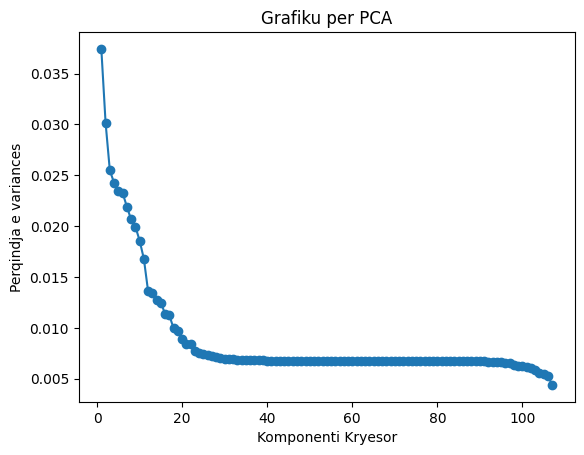

In [ ]:

df_new = pd.read_csv("Datasets/Week4_transformed_final2.csv")

df_num = df_new.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA ka reduktuar nga {X_scaled.shape[1]} ne {X_pca.shape[1]} komponente.")
print("Perqindja e variances se shpjeguar (10 te parat):", pca.explained_variance_ratio_[:10])

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Grafiku per PCA')
plt.xlabel('Komponenti kryesor - atributi')
plt.ylabel('Perqindja e variances')
plt.show()

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.to_csv("Datasets/Week4_PCA.csv", index=False)
